In [1868]:
# A dataset with records of the house prices of 9,761 houses in King County, Washington, US. 
# The house prices are recorded along with some other attributes like - area of the house, number of bedrooms, 
# number of bathrooms, etc

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1869]:
train_data = pd.read_csv(r'C:\Users\daksh\Praxis PGPDS\Term-1 subjects\Credit subjects\SQL and ML\Machine Learning (Algorithms)\Project\kc_house_train_data.csv')

In [1870]:
test_data = pd.read_csv(r'C:\Users\daksh\Praxis PGPDS\Term-1 subjects\Credit subjects\SQL and ML\Machine Learning (Algorithms)\Project\kc_house_test_data.csv')

In [1871]:
train_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,9212900260,20140527T000000,468000.0,2,1.00,1160,6000,1.0,0,0,...,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,114101516,20140528T000000,310000.0,3,1.00,1430,19901,1.5,0,0,...,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,6054650070,20141007T000000,400000.0,3,1.75,1370,9680,1.0,0,0,...,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208


In [1872]:
test_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570
1,1175000570,20150312T000000,530000.0,5,2.00,1810,4850,1.5,0,0,...,7,1810,0,1900,0,98107,47.6700,-122.394,1360,4850
2,16000397,20141205T000000,189000.0,2,1.00,1200,9850,1.0,0,0,...,7,1200,0,1921,0,98002,47.3089,-122.210,1060,5095
3,461000390,20140624T000000,687500.0,4,1.75,2330,5000,1.5,0,0,...,7,1510,820,1929,0,98117,47.6823,-122.368,1460,5000
4,7895500070,20150213T000000,240000.0,4,1.00,1220,8075,1.0,0,0,...,7,890,330,1969,0,98001,47.3341,-122.282,1290,7800


Questions :-
1. How the sale prices are ranging (increasing/decreasing) ?
2. On what factors does the selling price of a house depend upon ?

Hypothesis :-
1. There should be a standard cost of living for the location given, so the price range of houses should have less variation, on an avg. 
    Generally, there is a standard property cost for the houses of a location, unless the features of the house are drastically different than others.

2. Factors affecting -> Area of the house, no. of bedrooms/bathrooms/floors, landscape/maintenance/rating of the house, location of the house, yrs built/sold/renovated

# EDA

In [1873]:
train_data.shape

(9761, 21)

In [1874]:
test_data.shape

(2217, 21)

In [1875]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9761 entries, 0 to 9760
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             9761 non-null   int64  
 1   date           9761 non-null   object 
 2   price          9761 non-null   float64
 3   bedrooms       9761 non-null   int64  
 4   bathrooms      9761 non-null   float64
 5   sqft_living    9761 non-null   int64  
 6   sqft_lot       9761 non-null   int64  
 7   floors         9761 non-null   float64
 8   waterfront     9761 non-null   int64  
 9   view           9761 non-null   int64  
 10  condition      9761 non-null   int64  
 11  grade          9761 non-null   int64  
 12  sqft_above     9761 non-null   int64  
 13  sqft_basement  9761 non-null   int64  
 14  yr_built       9761 non-null   int64  
 15  yr_renovated   9761 non-null   int64  
 16  zipcode        9761 non-null   int64  
 17  lat            9761 non-null   float64
 18  long    

In [1876]:
train_data = train_data.drop('id', axis=1)

In [1877]:
test_data = test_data.drop('id', axis=1)

In [1878]:
train_data[['bathrooms', 'floors']] = train_data[['bathrooms', 'floors']].astype('int64')

In [1879]:
test_data[['bathrooms', 'floors']] = test_data[['bathrooms', 'floors']].astype('int64')

In [1880]:
train_data['date'] = train_data['date'].apply(pd.to_datetime)

In [1881]:
test_data['date'] = test_data['date'].apply(pd.to_datetime)

In [1882]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2217 entries, 0 to 2216
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           2217 non-null   datetime64[ns]
 1   price          2217 non-null   float64       
 2   bedrooms       2217 non-null   int64         
 3   bathrooms      2217 non-null   int64         
 4   sqft_living    2217 non-null   int64         
 5   sqft_lot       2217 non-null   int64         
 6   floors         2217 non-null   int64         
 7   waterfront     2217 non-null   int64         
 8   view           2217 non-null   int64         
 9   condition      2217 non-null   int64         
 10  grade          2217 non-null   int64         
 11  sqft_above     2217 non-null   int64         
 12  sqft_basement  2217 non-null   int64         
 13  yr_built       2217 non-null   int64         
 14  yr_renovated   2217 non-null   int64         
 15  zipcode        2217 n

In [1883]:
train_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,7,860,300,1942,0,98115,47.6900,-122.292,1330,6000
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,7,1430,0,1927,0,98028,47.7558,-122.229,1780,12697
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,7,1370,0,1977,0,98074,47.6127,-122.045,1370,10208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,2015-01-26,429000.0,3,2,1490,1126,3,0,0,3,8,1490,0,2014,0,98144,47.5699,-122.288,1400,1230
9757,2014-10-14,610685.0,4,2,2520,6023,2,0,0,3,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
9758,2015-03-26,1007500.0,4,3,3510,7200,2,0,0,3,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
9759,2014-06-23,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007


In [1884]:
train_data['yr_sold'] = pd.DatetimeIndex(train_data['date']).year

In [1885]:
test_data['yr_sold'] = pd.DatetimeIndex(test_data['date']).year

In [1886]:
# test_data = test_data.drop('id', axis=1)

In [1887]:
test_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,530000.0,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,189000.0,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,687500.0,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,240000.0,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2014-12-15,405000.0,4,2,1980,5020,2,0,0,3,...,1980,0,2007,0,98056,47.5147,-122.190,1980,5064,2014
2213,2014-08-08,388000.0,3,2,2198,6222,2,0,2,3,...,2198,0,2010,0,98198,47.3906,-122.304,2198,7621,2014
2214,2015-05-02,608500.0,4,3,2850,5577,2,0,0,3,...,1950,900,2014,0,98056,47.5252,-122.192,2850,5708,2015
2215,2014-07-07,230000.0,3,1,1140,1201,2,0,0,3,...,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014


In [1888]:
# train_data.isnull().sum()

In [1889]:
# test_data.isnull().sum()

In [1890]:
train_data.duplicated().sum()

0

In [1891]:
test_data.duplicated().sum()

0

In [1892]:
train_data.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0,9761.0
mean,542735.0,3.0,2.0,2087.0,15215.0,1.0,0.0,0.0,3.0,8.0,1793.0,293.0,1971.0,86.0,98078.0,48.0,-122.0,1992.0,12825.0,2014.0
std,379528.0,1.0,1.0,927.0,41267.0,1.0,0.0,1.0,1.0,1.0,836.0,443.0,29.0,405.0,53.0,0.0,0.0,687.0,26518.0,0.0
min,80000.0,0.0,0.0,290.0,520.0,1.0,0.0,0.0,1.0,1.0,290.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,620.0,660.0,2014.0
25%,320000.0,3.0,1.0,1420.0,5100.0,1.0,0.0,0.0,3.0,7.0,1190.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5160.0,2014.0
50%,450000.0,3.0,2.0,1910.0,7642.0,1.0,0.0,0.0,3.0,7.0,1570.0,0.0,1975.0,0.0,98065.0,48.0,-122.0,1840.0,7660.0,2014.0
75%,649000.0,4.0,2.0,2570.0,10660.0,2.0,0.0,0.0,4.0,8.0,2230.0,570.0,1996.0,0.0,98117.0,48.0,-122.0,2370.0,10113.0,2015.0
max,7700000.0,33.0,8.0,12050.0,1651359.0,3.0,1.0,4.0,5.0,13.0,8860.0,3480.0,2015.0,2015.0,98199.0,48.0,-121.0,5790.0,560617.0,2015.0


In [1893]:
## there are very high-end and very low-end houses in the data, the data is highly varied with std of 3,79,528
## due to this variation, median is more significant measure for this data than mean, as there are outliers in the high-end range
## most no. of houses lie in the price range 320000 and 650000 i.e. reasonable price houses

(array([8.592e+03, 9.720e+02, 1.310e+02, 4.200e+01, 1.700e+01, 4.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  80000.,  842000., 1604000., 2366000., 3128000., 3890000.,
        4652000., 5414000., 6176000., 6938000., 7700000.]),
 <BarContainer object of 10 artists>)

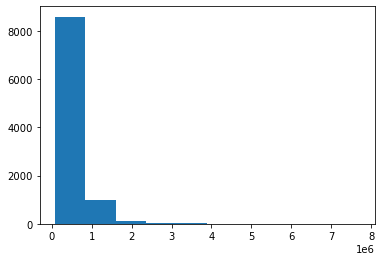

In [1894]:
plt.hist(train_data['price'])

(array([1.146e+03, 8.010e+02, 1.680e+02, 5.500e+01, 2.700e+01, 5.000e+00,
        6.000e+00, 4.000e+00, 4.000e+00, 1.000e+00]),
 array([  83000.,  459700.,  836400., 1213100., 1589800., 1966500.,
        2343200., 2719900., 3096600., 3473300., 3850000.]),
 <BarContainer object of 10 artists>)

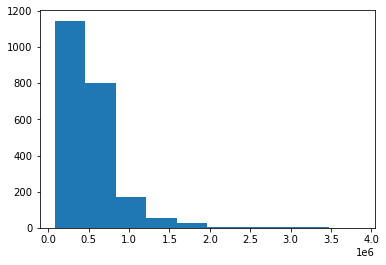

In [1895]:
plt.hist(test_data['price'])

In [1896]:
test_data.describe().round()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0,2217.0
mean,538643.0,3.0,2.0,2073.0,13555.0,1.0,0.0,0.0,3.0,8.0,1791.0,282.0,1971.0,86.0,98079.0,48.0,-122.0,1986.0,12148.0,2014.0
std,358422.0,1.0,1.0,897.0,29606.0,1.0,0.0,1.0,1.0,1.0,836.0,424.0,30.0,406.0,53.0,0.0,0.0,686.0,22905.0,0.0
min,83000.0,1.0,0.0,420.0,683.0,1.0,0.0,0.0,1.0,4.0,420.0,0.0,1900.0,0.0,98001.0,47.0,-123.0,399.0,755.0,2014.0
25%,320000.0,3.0,1.0,1460.0,5000.0,1.0,0.0,0.0,3.0,7.0,1200.0,0.0,1951.0,0.0,98033.0,47.0,-122.0,1490.0,5078.0,2014.0
50%,450000.0,3.0,2.0,1910.0,7526.0,1.0,0.0,0.0,3.0,7.0,1560.0,0.0,1975.0,0.0,98070.0,48.0,-122.0,1830.0,7551.0,2014.0
75%,635000.0,4.0,2.0,2490.0,10464.0,2.0,0.0,0.0,4.0,8.0,2220.0,540.0,1997.0,0.0,98118.0,48.0,-122.0,2370.0,10000.0,2015.0
max,3850000.0,9.0,6.0,7850.0,435600.0,3.0,1.0,4.0,5.0,12.0,7850.0,2570.0,2015.0,2015.0,98199.0,48.0,-121.0,6210.0,292645.0,2015.0


In [1897]:
# train data and test data are quite similar or consistent in the manner that the median/mean price is roughly the same 
# and the distribution of price is also similar within the IQR
# significant difference is in the max prices

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

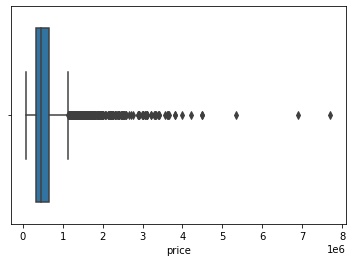

In [1898]:
sns.boxplot(train_data['price'])

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

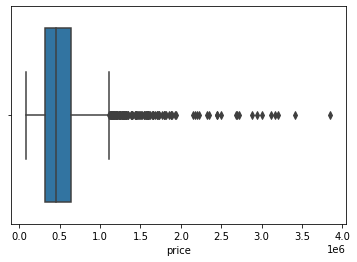

In [1899]:
sns.boxplot(test_data['price'])

In [1900]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [1901]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


In [1902]:
train_data[['price']].value_counts()

price    
450000.0     77
550000.0     76
350000.0     76
375000.0     69
250000.0     66
             ..
448500.0      1
446950.0      1
446800.0      1
446250.0      1
7700000.0     1
Length: 2533, dtype: int64

In [1903]:
test_data[['price']].value_counts()

price    
500000.0     20
400000.0     19
425000.0     18
350000.0     18
600000.0     18
             ..
432000.0      1
432500.0      1
433500.0      1
437500.0      1
3850000.0     1
Length: 1013, dtype: int64

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Bedrooms count')

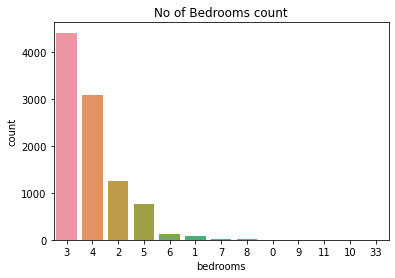

In [1904]:
sns.countplot(train_data.bedrooms, order=train_data.bedrooms.value_counts().index);
plt.title("No of Bedrooms count")

In [1905]:
# train_bd_1 = train_data[train_data['bedrooms'] == 0].index
train_bd_2 = train_data[train_data['bedrooms'] == 33].index

In [1906]:
# REMOVING INCONSISTENT DATA

In [1907]:
train_data.drop(train_bd_2, inplace=True)

In [1908]:
# train_data.drop(train_bd_1, inplace=True)

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of Bedrooms count')

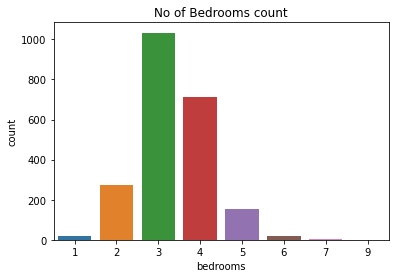

In [1909]:
sns.countplot(test_data.bedrooms);
plt.title("No of Bedrooms count")

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of bathroom Counts')

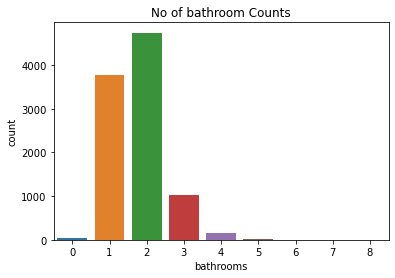

In [1910]:
sns.countplot(train_data.bathrooms);
plt.title('No of bathroom Counts')

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'No of bathroom Counts')

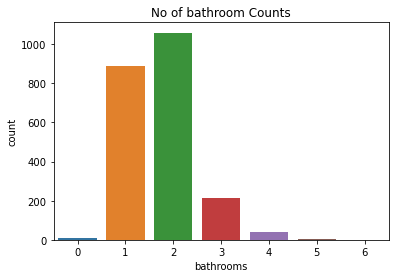

In [1911]:
sns.countplot(test_data.bathrooms);
plt.title('No of bathroom Counts')

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Floors')

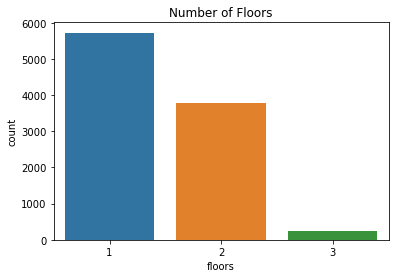

In [1912]:
sns.countplot(train_data.floors,order=train_data.floors.value_counts().index);
plt.title("Number of Floors")

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Floors')

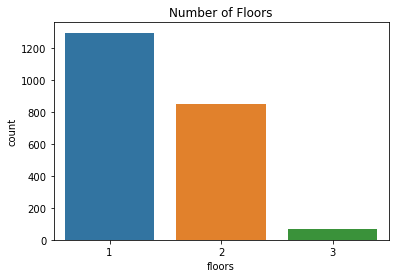

In [1913]:
sns.countplot(test_data.floors,order=test_data.floors.value_counts().index);
plt.title("Number of Floors")

In [1914]:
train_data[['waterfront']].value_counts()

waterfront
0             9678
1               82
dtype: int64

In [1915]:
test_data[['waterfront']].value_counts()

waterfront
0             2204
1               13
dtype: int64

In [1916]:
train_data[['view']].value_counts()

view
0       8747
2        454
3        243
1        160
4        156
dtype: int64

In [1917]:
test_data[['view']].value_counts()

view
0       2006
2         92
3         57
1         33
4         29
dtype: int64

In [1918]:
train_data[['condition']].value_counts()

condition
3            6291
4            2610
5             771
2              78
1              10
dtype: int64

In [1919]:
test_data[['condition']].value_counts()

condition
3            1437
4             564
5             190
2              23
1               3
dtype: int64

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Types of Grades')

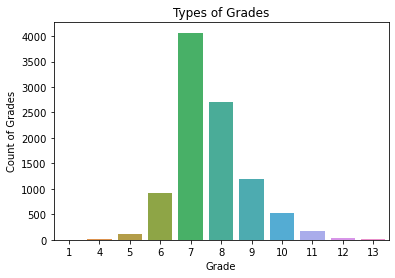

In [1920]:
from collections import Counter
sns.barplot(list(Counter(train_data.grade).keys()),list(Counter(train_data.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades")

C:\Users\daksh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Types of Grades')

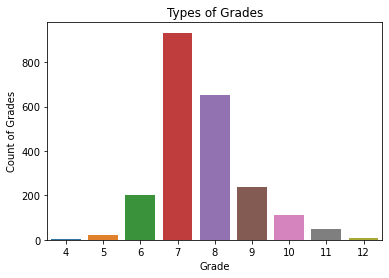

In [1921]:
sns.barplot(list(Counter(test_data.grade).keys()),list(Counter(test_data.grade).values()));
plt.xlabel("Grade");
plt.ylabel("Count of Grades");
plt.title("Types of Grades")

In [1922]:
train_data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2014-12-09,604000.0,4,3,1960,5000,1,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
1,2014-05-12,1225000.0,4,4,5420,101930,1,0,0,3,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014
2,2014-05-27,468000.0,2,1,1160,6000,1,0,0,4,...,860,300,1942,0,98115,47.6900,-122.292,1330,6000,2014
3,2014-05-28,310000.0,3,1,1430,19901,1,0,0,4,...,1430,0,1927,0,98028,47.7558,-122.229,1780,12697,2014
4,2014-10-07,400000.0,3,1,1370,9680,1,0,0,4,...,1370,0,1977,0,98074,47.6127,-122.045,1370,10208,2014


<AxesSubplot:xlabel='bedrooms', ylabel='price'>

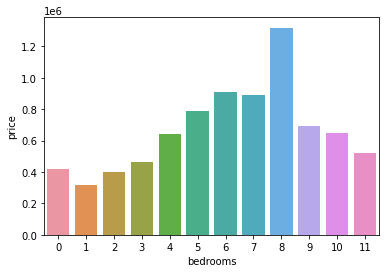

In [1923]:
sns.barplot(x=train_data['bedrooms'], y=train_data['price'], ci=False)

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

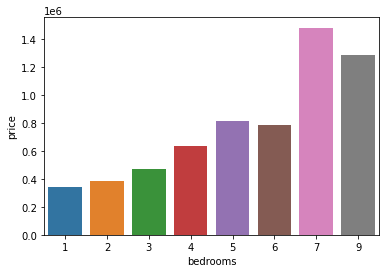

In [1924]:
sns.barplot(x=test_data['bedrooms'], y=test_data['price'], ci=False)

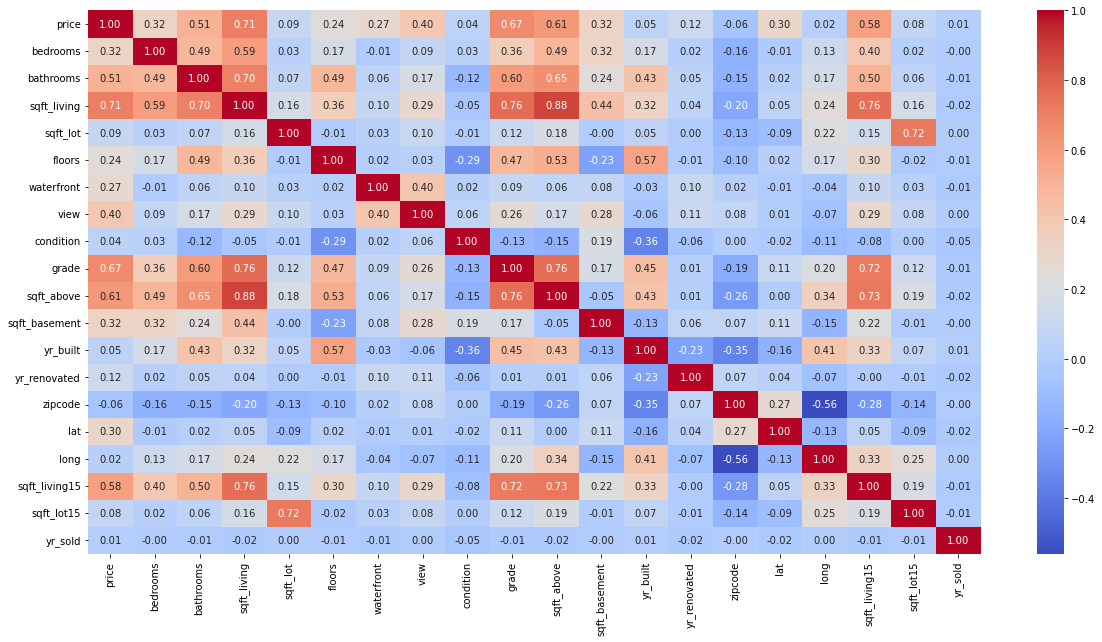

In [1925]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(train_data.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
plt.savefig('chart1', dpi=400)

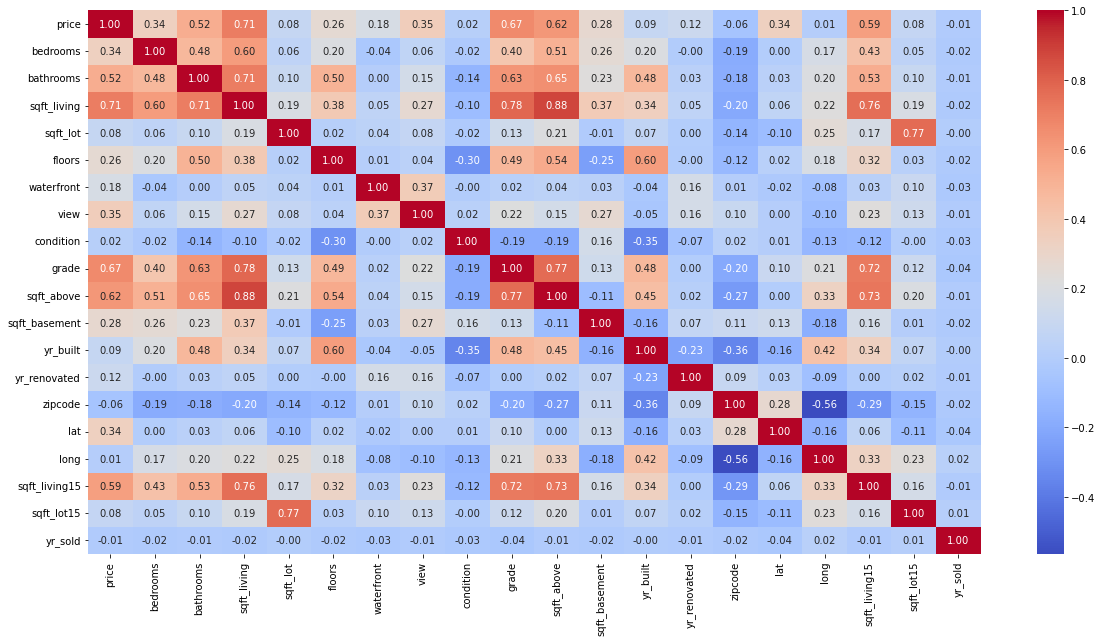

In [1926]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(test_data.corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".2f")
plt.savefig('chart1', dpi=400)

In [1927]:
# train_data = train_data.reset_index()
train_data.duplicated(['lat', 'long']).sum()

151

In [1928]:
# train_data.yr_renovated[train_data.yr_renovated != 0] = 1

In [1929]:
# test_data.yr_renovated[test_data.yr_renovated != 0] = 1

In [1930]:
test_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
0,2015-03-12,323000.0,3,2,1890,6560,2,0,0,3,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,2015
1,2015-03-12,530000.0,5,2,1810,4850,1,0,0,3,...,1810,0,1900,0,98107,47.6700,-122.394,1360,4850,2015
2,2014-12-05,189000.0,2,1,1200,9850,1,0,0,4,...,1200,0,1921,0,98002,47.3089,-122.210,1060,5095,2014
3,2014-06-24,687500.0,4,1,2330,5000,1,0,0,4,...,1510,820,1929,0,98117,47.6823,-122.368,1460,5000,2014
4,2015-02-13,240000.0,4,1,1220,8075,1,0,0,2,...,890,330,1969,0,98001,47.3341,-122.282,1290,7800,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,2014-12-15,405000.0,4,2,1980,5020,2,0,0,3,...,1980,0,2007,0,98056,47.5147,-122.190,1980,5064,2014
2213,2014-08-08,388000.0,3,2,2198,6222,2,0,2,3,...,2198,0,2010,0,98198,47.3906,-122.304,2198,7621,2014
2214,2015-05-02,608500.0,4,3,2850,5577,2,0,0,3,...,1950,900,2014,0,98056,47.5252,-122.192,2850,5708,2015
2215,2014-07-07,230000.0,3,1,1140,1201,2,0,0,3,...,1140,0,2014,0,98108,47.5637,-122.295,1210,1552,2014


In [1931]:
# train_data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [1932]:
# test_data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [1933]:
train_data = train_data.drop('date', axis=1)
test_data = test_data.drop('date', axis=1)

In [1934]:
train_data['sales_age'] = train_data.yr_sold - train_data.yr_built

In [1935]:
test_data['sales_age'] = test_data.yr_sold - test_data.yr_built

In [1936]:
train_age_1 = train_data[train_data['sales_age'] < 0].index
train_data.drop(train_age_1, inplace=True)

In [1937]:
test_age = test_data[test_data['sales_age'] < 0].index
test_data.drop(test_age, inplace=True)

In [1938]:
train_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,sales_age
0,604000.0,4,3,1960,5000,1,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,49
1,1225000.0,4,4,5420,101930,1,0,0,3,11,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014,13
2,468000.0,2,1,1160,6000,1,0,0,4,7,...,300,1942,0,98115,47.6900,-122.292,1330,6000,2014,72
3,310000.0,3,1,1430,19901,1,0,0,4,7,...,0,1927,0,98028,47.7558,-122.229,1780,12697,2014,87
4,400000.0,3,1,1370,9680,1,0,0,4,7,...,0,1977,0,98074,47.6127,-122.045,1370,10208,2014,37


In [1939]:
train_data_reno_yr = train_data[train_data['yr_renovated'] != 0]

In [1940]:
test_data_reno_yr = test_data[test_data['yr_renovated'] != 0]

In [1941]:
train_age_2 = train_data_reno_yr[train_data_reno_yr['yr_renovated'] > train_data_reno_yr['yr_sold']].index
train_data.drop(train_age_2, inplace=True)

In [1942]:
test_age_2 = test_data_reno_yr[test_data_reno_yr['yr_renovated'] > test_data_reno_yr['yr_sold']].index
test_data.drop(test_age_2, inplace=True)

In [1943]:
train_data.drop('yr_built',axis=1,inplace=True)
train_data.drop('yr_sold',axis=1,inplace=True)
test_data.drop('yr_built',axis=1,inplace=True)
test_data.drop('yr_sold',axis=1,inplace=True)

In [1944]:
train_data.drop('zipcode',axis=1,inplace=True)
test_data.drop('zipcode',axis=1,inplace=True)

In [1945]:
# train_data.drop('renovated',axis=1,inplace=True)

In [1946]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_age
0,604000.0,4,3,1960,5000,1,0,0,5,7,1050,910,0,47.5208,-122.393,1360,5000,49
1,1225000.0,4,4,5420,101930,1,0,0,3,11,3890,1530,0,47.6561,-122.005,4760,101930,13
2,468000.0,2,1,1160,6000,1,0,0,4,7,860,300,0,47.6900,-122.292,1330,6000,72
3,310000.0,3,1,1430,19901,1,0,0,4,7,1430,0,0,47.7558,-122.229,1780,12697,87
4,400000.0,3,1,1370,9680,1,0,0,4,7,1370,0,0,47.6127,-122.045,1370,10208,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2,1490,1126,3,0,0,3,8,1490,0,0,47.5699,-122.288,1400,1230,1
9757,610685.0,4,2,2520,6023,2,0,0,3,9,2520,0,0,47.5137,-122.167,2520,6023,0
9758,1007500.0,4,3,3510,7200,2,0,0,3,9,2600,910,0,47.5537,-122.398,2050,6200,6
9759,402101.0,2,0,1020,1350,2,0,0,3,7,1020,0,0,47.5944,-122.299,1020,2007,5


In [1947]:
dummy1_train = pd.get_dummies(train_data.condition, prefix='condition')
dummy1_train

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
9756,0,0,1,0,0
9757,0,0,1,0,0
9758,0,0,1,0,0
9759,0,0,1,0,0


In [1948]:
train_data = train_data.join(dummy1_train)

In [1949]:
train_data.drop('condition',axis=1,inplace=True)

In [1950]:
test_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_renovated,lat,long,sqft_living15,sqft_lot15,sales_age
0,323000.0,3,2,1890,6560,2,0,0,3,7,1890,0,0,47.3684,-122.031,2390,7570,12
1,530000.0,5,2,1810,4850,1,0,0,3,7,1810,0,0,47.6700,-122.394,1360,4850,115
2,189000.0,2,1,1200,9850,1,0,0,4,7,1200,0,0,47.3089,-122.210,1060,5095,93
3,687500.0,4,1,2330,5000,1,0,0,4,7,1510,820,0,47.6823,-122.368,1460,5000,85
4,240000.0,4,1,1220,8075,1,0,0,2,7,890,330,0,47.3341,-122.282,1290,7800,46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,405000.0,4,2,1980,5020,2,0,0,3,7,1980,0,0,47.5147,-122.190,1980,5064,7
2213,388000.0,3,2,2198,6222,2,0,2,3,8,2198,0,0,47.3906,-122.304,2198,7621,4
2214,608500.0,4,3,2850,5577,2,0,0,3,8,1950,900,0,47.5252,-122.192,2850,5708,1
2215,230000.0,3,1,1140,1201,2,0,0,3,8,1140,0,0,47.5637,-122.295,1210,1552,0


In [1951]:
dummy1_test = pd.get_dummies(test_data.condition, prefix='condition')
test_data = test_data.join(dummy1_test)

In [1952]:
test_data.drop('condition',axis=1,inplace=True)

In [1953]:
dummy2_train = pd.get_dummies(train_data.grade, prefix='grade')
train_data = train_data.join(dummy2_train)

In [1954]:
train_data.drop('grade',axis=1,inplace=True)

In [1955]:
dummy2_test = pd.get_dummies(test_data.grade, prefix='grade')
test_data = test_data.join(dummy2_test)

In [1956]:
test_data.drop('grade',axis=1,inplace=True)

In [1957]:
dummy3_train = pd.get_dummies(train_data.waterfront, prefix='waterfront')
train_data = train_data.join(dummy3_train)
train_data.drop('waterfront',axis=1,inplace=True)

In [1958]:
dummy3_test = pd.get_dummies(test_data.waterfront, prefix='waterfront')
test_data = test_data.join(dummy3_test)
test_data.drop('waterfront',axis=1,inplace=True)

In [1959]:
train_data.loc[train_data["yr_renovated"] != 0, "yr_renovated"] = 1

In [1960]:
test_data.loc[test_data["yr_renovated"] != 0, "yr_renovated"] = 1

In [1961]:
train_data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [1962]:
test_data.rename(columns={'yr_renovated': 'renovated'}, inplace=True)

In [1963]:
train_data.loc[train_data["sqft_basement"] != 0, "sqft_basement"] = 1
train_data.rename(columns={'sqft_basement': 'basement'}, inplace=True)

In [1964]:
test_data.loc[test_data["sqft_basement"] != 0, "sqft_basement"] = 1
test_data.rename(columns={'sqft_basement': 'basement'}, inplace=True)

In [1965]:
dummy4_train = pd.get_dummies(train_data.basement, prefix='basement')
train_data = train_data.join(dummy4_train)
train_data.drop('basement',axis=1,inplace=True)

In [1966]:
dummy4_test = pd.get_dummies(test_data.basement, prefix='basement')
test_data = test_data.join(dummy4_test)
test_data.drop('basement',axis=1,inplace=True)

In [1967]:
dummy5_train = pd.get_dummies(train_data.renovated, prefix='renovated')
train_data = train_data.join(dummy5_train)
train_data.drop('renovated',axis=1,inplace=True)

In [1968]:
dummy5_test = pd.get_dummies(test_data.renovated, prefix='renovated')
test_data = test_data.join(dummy5_test)
test_data.drop('renovated',axis=1,inplace=True)

In [1969]:
# train_data.info()

In [1970]:
# test_data.info()

In [1971]:
test_data['grade_1'] = 0
test_data['grade_13'] = 0

In [1972]:
test_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,...,grade_11,grade_12,waterfront_0,waterfront_1,basement_0,basement_1,renovated_0,renovated_1,grade_1,grade_13
0,323000.0,3,2,1890,6560,2,0,1890,47.3684,-122.031,...,0,0,1,0,1,0,1,0,0,0
1,530000.0,5,2,1810,4850,1,0,1810,47.6700,-122.394,...,0,0,1,0,1,0,1,0,0,0
2,189000.0,2,1,1200,9850,1,0,1200,47.3089,-122.210,...,0,0,1,0,1,0,1,0,0,0
3,687500.0,4,1,2330,5000,1,0,1510,47.6823,-122.368,...,0,0,1,0,0,1,1,0,0,0
4,240000.0,4,1,1220,8075,1,0,890,47.3341,-122.282,...,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2212,405000.0,4,2,1980,5020,2,0,1980,47.5147,-122.190,...,0,0,1,0,1,0,1,0,0,0
2213,388000.0,3,2,2198,6222,2,2,2198,47.3906,-122.304,...,0,0,1,0,1,0,1,0,0,0
2214,608500.0,4,3,2850,5577,2,0,1950,47.5252,-122.192,...,0,0,1,0,0,1,1,0,0,0
2215,230000.0,3,1,1140,1201,2,0,1140,47.5637,-122.295,...,0,0,1,0,1,0,1,0,0,0


In [1973]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,...,grade_10,grade_11,grade_12,grade_13,waterfront_0,waterfront_1,basement_0,basement_1,renovated_0,renovated_1
0,604000.0,4,3,1960,5000,1,0,1050,47.5208,-122.393,...,0,0,0,0,1,0,0,1,1,0
1,1225000.0,4,4,5420,101930,1,0,3890,47.6561,-122.005,...,0,1,0,0,1,0,0,1,1,0
2,468000.0,2,1,1160,6000,1,0,860,47.6900,-122.292,...,0,0,0,0,1,0,0,1,1,0
3,310000.0,3,1,1430,19901,1,0,1430,47.7558,-122.229,...,0,0,0,0,1,0,1,0,1,0
4,400000.0,3,1,1370,9680,1,0,1370,47.6127,-122.045,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2,1490,1126,3,0,1490,47.5699,-122.288,...,0,0,0,0,1,0,1,0,1,0
9757,610685.0,4,2,2520,6023,2,0,2520,47.5137,-122.167,...,0,0,0,0,1,0,1,0,1,0
9758,1007500.0,4,3,3510,7200,2,0,2600,47.5537,-122.398,...,0,0,0,0,1,0,0,1,1,0
9759,402101.0,2,0,1020,1350,2,0,1020,47.5944,-122.299,...,0,0,0,0,1,0,1,0,1,0


In [1974]:
train_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,sqft_above,lat,long,...,grade_10,grade_11,grade_12,grade_13,waterfront_0,waterfront_1,basement_0,basement_1,renovated_0,renovated_1
0,604000.0,4,3,1960,5000,1,0,1050,47.5208,-122.393,...,0,0,0,0,1,0,0,1,1,0
1,1225000.0,4,4,5420,101930,1,0,3890,47.6561,-122.005,...,0,1,0,0,1,0,0,1,1,0
2,468000.0,2,1,1160,6000,1,0,860,47.6900,-122.292,...,0,0,0,0,1,0,0,1,1,0
3,310000.0,3,1,1430,19901,1,0,1430,47.7558,-122.229,...,0,0,0,0,1,0,1,0,1,0
4,400000.0,3,1,1370,9680,1,0,1370,47.6127,-122.045,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9756,429000.0,3,2,1490,1126,3,0,1490,47.5699,-122.288,...,0,0,0,0,1,0,1,0,1,0
9757,610685.0,4,2,2520,6023,2,0,2520,47.5137,-122.167,...,0,0,0,0,1,0,1,0,1,0
9758,1007500.0,4,3,3510,7200,2,0,2600,47.5537,-122.398,...,0,0,0,0,1,0,0,1,1,0
9759,402101.0,2,0,1020,1350,2,0,1020,47.5944,-122.299,...,0,0,0,0,1,0,1,0,1,0


### Linear Regressor

In [1975]:
X_train = train_data.loc[:, train_data.columns != 'price']
X_test = test_data.loc[:,test_data.columns != 'price']
y_train = train_data[['price']] # target variables
y_test = test_data[['price']]

In [1976]:
#Train-Validation Split
# from sklearn.model_selection import train_test_split
# X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [1977]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# regr.fit(X_tr, y_tr)

In [1978]:
# y_pred = regr.predict(X_valid)
# y_pred

In [1979]:
from sklearn.model_selection import cross_val_score
cv1 = cross_val_score(regr, X_train, y_train, scoring='r2', cv = 10)

In [1980]:
cv1.mean() # score without normalized / standardized values

0.7135988877096509

In [1981]:
cv2 = cross_val_score(regr, X_train, y_train, scoring='neg_root_mean_squared_error', cv = 10)

In [1982]:
abs(cv2.mean()) # score without normalized values

199683.36396907183

In [1983]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

### KNN Regressor

In [1984]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
tr_df = scaler.fit_transform(train_data.loc[:, train_data.columns != 'price'].values)
tr_df = pd.DataFrame(tr_df, columns=train_data.columns[1:])

In [1985]:
# ts_df = scaler.fit_transform(test_data.values)
# test_data = pd.DataFrame(ts_df, columns=test_data.columns)

In [1986]:
X_train = tr_df.loc[:, tr_df.columns != 'price']
y_train = train_data[['price']] # target variables

In [1987]:
from sklearn.model_selection import train_test_split
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [1988]:
import numpy as np
from sklearn import neighbors
neighbour = np.arange(1,51)
mad = []

for k in neighbour:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_tr, y_tr)
    predicted_values = knn.predict(X_valid)
    mad.append(np.mean(np.abs(y_valid - predicted_values)))

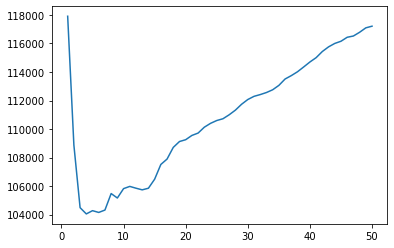

In [1989]:
plt.plot(neighbour, np.array(mad))
plt.show()

In [1990]:
model = neighbors.KNeighborsRegressor(n_neighbors = 5)

In [1991]:
# from sklearn import neighbors
# from sklearn.metrics import mean_squared_error 
# from math import sqrt
# from sklearn.metrics import r2_score

# # rmse_val = [] #to store rmse values for different k
# for K in range(10):
#     K = K+1
#     model = neighbors.KNeighborsRegressor(n_neighbors = K)
#     model.fit(X_tr, y_tr)  #fit the model
    
#     y_pred = model.predict(X_valid)
    
# #     error = sqrt(mean_squared_error(y_valid, y_pred)) #calculate rmse
#     r2 = r2_score(y_valid, y_pred)
#     print('R2 score for k= ' , K , 'is:', r2)

In [1992]:
# KNN for k = 10
# model = neighbors.KNeighborsRegressor(n_neighbors = 10)
# model.fit(X_train, y_train)  #fit the model
# y_pred = model.predict(X_valid)

In [1993]:
cv3 = cross_val_score(model, X_valid, y_valid, scoring='r2', cv = 10)

In [1994]:
cv3 # score with normalized values

array([0.66786286, 0.68425912, 0.73217889, 0.72650842, 0.72502021,
       0.59159717, 0.60779889, 0.60307295, 0.69999776, 0.59095153])

In [1995]:
cv4 = cross_val_score(model, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)
abs(cv4) # score with normalized values

array([198544.6678116 , 203408.29944745, 235641.08243557, 141104.15062437,
       205958.66646786, 267117.46674146, 369972.04124068, 251986.54682731,
       187376.69644388, 326287.00840925])

### Decision Tree Regression

In [1996]:
X_train = train_data.loc[:, train_data.columns != 'price']
y_train = train_data[['price']]

In [1997]:
X_tr, X_valid, y_tr, y_valid = train_test_split(X_train, y_train, test_size = 0.25)

In [1998]:
depth = np.arange(1,15)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k, min_samples_leaf=5)
    reg_tree.fit(X_tr, y_tr)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(np.array(y_valid) - y_pred)))

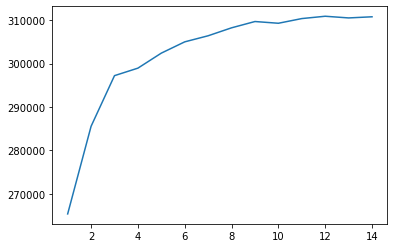

In [1999]:
plt.plot(depth, np.array(mae))
plt.show()

In [2000]:
leaf = np.arange(1,20)
mae = []

for k in leaf:
    reg_tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=k)
    reg_tree.fit(X_tr, y_tr)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(np.array(y_valid) - y_pred)))

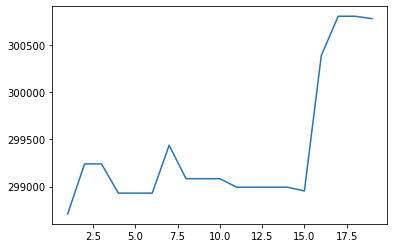

In [2001]:
plt.plot(leaf, np.array(mae))
plt.show()

In [2003]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4,min_samples_leaf=20)

In [2004]:
cv5 = cross_val_score(reg_tree, X_valid, y_valid, scoring='r2', cv = 10)

In [2005]:
cv5

array([0.66429872, 0.60990003, 0.60759892, 0.58928067, 0.68146902,
       0.6126889 , 0.65144965, 0.57551475, 0.48770081, 0.58030522])

In [2006]:
cv6 = cross_val_score(reg_tree, X_valid, y_valid, scoring='neg_root_mean_squared_error', cv = 10)

In [2007]:
cv6

array([-175599.52761505, -199497.92988405, -234257.41117316,
       -225029.77037899, -196193.81300443, -183490.18092875,
       -238456.76698212, -217381.95692487, -225753.46758106,
       -253047.40763008])

In [2011]:
# from sklearn import tree

# fig, axes = plt.subplots(figsize=(3,3), dpi=300)

# tree.plot_tree(reg_tree, feature_names=list(train_data), filled = False)

# plt.show()

In [ ]:
## random forest regressor